# Caso Titanic

## Importando as bibliotecas

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Abrindo o conjunto de dados

In [140]:
dataset = pd.read_csv('titanic.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Limpeza dos dados

## Verificando a quantidade de dados

In [141]:
lenOriginal = len(dataset)
print(lenOriginal)

891


## Analizando os tipos de dados

In [142]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Vemos que existe atributos que não chegam a 891, que existe slot's nulos.

## Verificando a presença de dados nulos

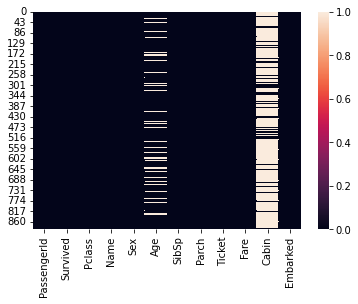

In [143]:
sns.heatmap(dataset.isnull())

In [144]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Atributos 'Age', 'Cabin' e 'Embarked' tem dados nulos, como 'Cabin' aparentemente não ajudará na analise, pois mais da metade é de dados nulos então será retirado.

In [145]:
dataset.drop(['Cabin'], axis=1, inplace=True)

In [146]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

Como o atributo 'Age' é um dado importante então não será retirado.

### Retirando as pessoas que estão com dados nulos

In [147]:
dataset.dropna(inplace=True)

In [148]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Não há mais dados nulos.

### Verificando a quantidade de dados que restaram

In [149]:
lenIsNotNull = len(dataset)
print(lenIsNotNull)

712


A perda de dados:

In [150]:
percaDados = lenOriginal - lenIsNotNull
print(percaDados)

179


# Análise dos dados

## Comparando a quantidade de sobreviventes

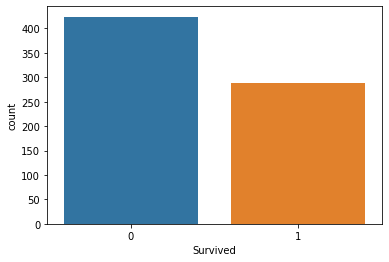

In [151]:
sns.countplot(x='Survived', data=dataset)

In [152]:
survivors = len(dataset[dataset['Survived'] == 1]['Survived'])
non_survivors = len(dataset[dataset['Survived'] == 0]['Survived'])

In [156]:
print(f'Number of survivors: {survivors}')
print(f'Number of deaths: {non_survivors}')

Number of survivors: 288
Number of deaths: 424


In [160]:
total = survivors + non_survivors
prob_survivors = survivors / total
prob_non_survivors = non_survivors / total

In [161]:
print(f'Probability of survival: {round(100*prob_survivors, 2)}%')
print(f'Probability of non-survival: {round(100*prob_non_survivors, 2)}%')

Probability of survival: 40.45%
Probability of non-survival: 59.55%


Analizando somente o atributo 'Survived' as pessoas tinham 40,45% desobreviver, porém devemos analizar por classe.

### Sobreviventes por classe

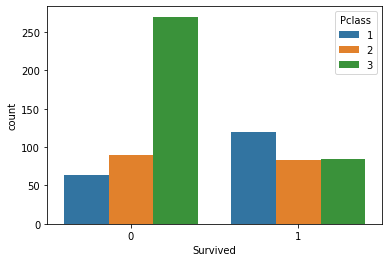

In [162]:
sns.countplot(x='Survived', data=dataset, hue='Pclass')

A grande parte dos mortos eram da 3ª classe.

In [163]:
pclass1 = dataset[dataset['Pclass'] == 1]['Survived']
pclass2 = dataset[dataset['Pclass'] == 2]['Survived']
pclass3 = dataset[dataset['Pclass'] == 3]['Survived']

### Quantidade de passageiros das classes

In [164]:
print(f'Number of 1st class passengers: {len(pclass1)}')
print(f'Number of 2st class passengers: {len(pclass2)}')
print(f'Number of 3st class passengers: {len(pclass3)}')

Number of 1st class passengers: 184
Number of 2st class passengers: 173
Number of 3st class passengers: 355


### Quantidade de sobreviventes das classes

In [165]:
surv_pclass1 = pclass1.sum()
print(f'Number of 1st class survivors: {surv_pclass1}')
surv_pclass2 = pclass2.sum()
print(f'Number of 2st class survivors: {surv_pclass2}')
surv_pclass3 = pclass3.sum()
print(f'Number of 3st class survivors: {surv_pclass3}')

Number of 1st class survivors: 120
Number of 2st class survivors: 83
Number of 3st class survivors: 85


### Probabilidade de sobreviver estando em cada classe

In [166]:
prob_surv_pclass1 = surv_pclass1 / len(pclass1)
prob_surv_pclass2 = surv_pclass2 / len(pclass2)
prob_surv_pclass3 = surv_pclass3 / len(pclass3)

In [167]:
print(f'Probability of surviving being 1st class: {round(100*prob_surv_pclass1, 2)}%')
print(f'Probability of surviving being 2st class: {round(100*prob_surv_pclass2, 2)}%')
print(f'Probability of surviving being 3st class: {round(100*prob_surv_pclass3, 2)}%')

Probability of surviving being 1st class: 65.22%
Probability of surviving being 2st class: 47.98%
Probability of surviving being 3st class: 23.94%


O melhor seria estar na 1ª classe.

In [168]:
dead_pclass1 = len(pclass1) - surv_pclass1
dead_pclass2 = len(pclass2) - surv_pclass2
dead_pclass3 = len(pclass3) - surv_pclass3

In [169]:
print(f'1st class number of dead: {dead_pclass1}')
print(f'2st class number of dead: {dead_pclass2}')
print(f'3st class number of dead: {dead_pclass3}')

1st class number of dead: 64
2st class number of dead: 90
3st class number of dead: 270


Vemos uma tendencia em salvar os da primeira e segunda classe. 

## Quantidade de passageiros por idade

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


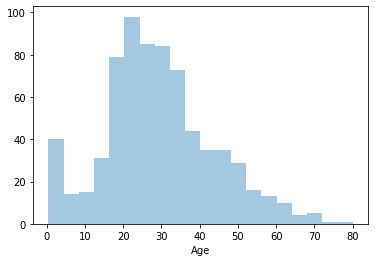

In [170]:
sns.distplot(dataset['Age'], kde=False)

### Idade por classe

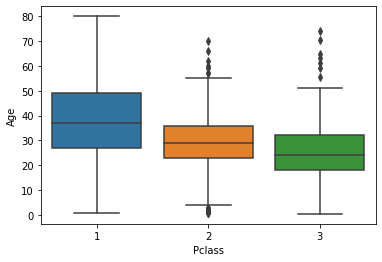

In [171]:
sns.boxplot(x='Pclass', y='Age', data=dataset)

### Média de idade de cada classe

In [176]:
mean_Pclass1 = round(dataset[dataset['Pclass'] == 1]['Age'].mean(), 2)
mean_Pclass2 = round(dataset[dataset['Pclass'] == 2]['Age'].mean(), 2)
mean_Pclass3 = round(dataset[dataset['Pclass'] == 3]['Age'].mean(), 2)

In [177]:
print(f'Average age of 1st grade: {mean_Pclass1}')
print(f'Average age of 2st grade: {mean_Pclass2}')
print(f'Average age of 3st grade: {mean_Pclass3}')

Average age of 1st grade: 38.11
Average age of 2st grade: 29.88
Average age of 3st grade: 25.14


### Variância das idades por classes

In [178]:
var_Pclass1 = round(dataset[dataset['Pclass'] == 1]['Age'].var(), 2)
var_Pclass2 = round(dataset[dataset['Pclass'] == 2]['Age'].var(), 2)
var_Pclass3 = round(dataset[dataset['Pclass'] == 3]['Age'].var(), 2)

In [179]:
print(f'Variance of age of 1st grade: {var_Pclass1}')
print(f'Variance of age of 2st grade: {var_Pclass2}')
print(f'Variance of age of 2st grade: {var_Pclass3}')

Variance of age of 1st grade: 218.42
Variance of age of 2st grade: 196.03
Variance of age of 2st grade: 156.13


# Rede Neural para predição de sobrevivente

## Verificando os dados

In [180]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Como os atributos 'PassengerId', 'Name' e 'Ticket' não ajudarão, então serão retirados.



In [181]:
dataset.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [182]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Analizando os dados nominais

In [183]:
dataset['Sex'].unique()

array(['male', 'female'], dtype=object)

In [184]:
dataset['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

### Transformando em dados numéricos

In [185]:
sex = pd.get_dummies(dataset['Sex'], drop_first=True)
print(sex)

     male
0       1
1       0
2       0
3       0
4       1
..    ...
885     0
886     1
887     0
889     1
890     1

[712 rows x 1 columns]


In [186]:
embarked = pd.get_dummies(dataset['Embarked'], drop_first=True)
print(embarked)

     Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
..  .. ..
885  1  0
886  0  1
887  0  1
889  0  0
890  1  0

[712 rows x 2 columns]


### Troco os dados nominais por dados numéricos

In [187]:
dataset.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [188]:
dataset = pd.concat([dataset, sex, embarked], axis=1)

### Verificando os dados

In [189]:
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Guardando os dados

In [190]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

## Pegando dados para treinamento

In [193]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [194]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Importando biblioteca para a rede neural

In [195]:
import tensorflow as tf

## Inicializando a rede neural

In [196]:
ann = tf.keras.models.Sequential()

## Adicionando a camadas

In [197]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [198]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

## Adicionando a camada de saída

In [199]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Compilando a rede neural

In [200]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Treinando a rede neural no conjunto de treinamento

In [201]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
18/18 [==============================] - 1s 2ms/step - loss: 0.7162 - accuracy: 0.4253
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.7058 - accuracy: 0.5132
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.5606
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5888
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.6046
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6758 - accuracy: 0.6116
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.6134
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6648 - accuracy: 0.6221
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6594 - accuracy: 0.6239
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6540 - accuracy: 0.6239
Epoch 11/

## Prevendo o resultado no conjunto de teste

In [202]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]

## Fazendo a matriz de confusão

In [203]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[73  9]
 [18 43]]


0.8111888111888111

O algorítimo está com 81,81% de prescisão.

### Mostrando a organização dos dados

In [204]:
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Prevendo sobrevivente

In [205]:
print(ann.predict(sc.transform([[3, 20, 0, 0, 70000, 1, 0, 0]])) > 0.5)

[[ True]]
